<h1><center> Binary classification as a phase separation process</center></h1>
<center>Rafael Monteiro <br>Mathematics for advanced Materials - Open Innovation Lab (MathAM-OIL, AIST), Sendai, Japan<br>
email : monteirodasilva-rafael@aist.jp, rafael.a.monteiro.math@gmail.com
</center>

This is a companion website to the article **Binary classification as a phase separation process**,
by [Rafael Monteiro](https://sites.google.com/view/rafaelmonteiro-math/home). A preprint is available on arXiv  https://arxiv.org/abs/2009.02467.

For the dataset and trainable models, see the <a href="https://doi.org/10.5281/zenodo.4005131"> data repository</a> at Zenodo.

In [1]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import  matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import scipy.sparse as sc
import sympy
import itertools as it

###-----------------------------------
## The modules for this paper are here
from  binary_phase_separation import *
from aux_fnts_for_jupyter_notebooks import *
###-----------------------------------

### In order to open ans save dictionaries
try:
    import cPickle as pickle
except ImportError: # python 3.x
    import pickle

import pandas as pd
import warnings
warnings.filterwarnings(action = "ignore", message = "internal issue")

## Things necessary to do nice plots
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from  matplotlib.transforms import Affine2D

# where we are saving stuff
import os, glob
PROJECT_DIR =  os.getcwd()
IMAGES = os.path.join(PROJECT_DIR,"figures/")
PROJECT_DIR = os.path.join(PROJECT_DIR)

In [2]:
from matplotlib import rcParams
plt.rc('axes',labelsize = 18)
plt.rc('xtick',labelsize = 16)
plt.rc('ytick',labelsize = 16)
plt.rc('font', size = 20)
plt.rc('legend',fontsize = 18)
rcParams['font.family'] =  "Times New Roman"
rcParams['mathtext.fontset'] =   'custom' 
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 10
rcParams['lines.markeredgewidth'] = 3

<h1><center>  Computational statistics and plot of data <br> PSBC trained on the MNIST database</center></h1>

In this Jupyter-notebook we shall use the following folders

In [3]:
stats_folder_MNIST = "Statistics/MNIST/"

Now we gather all the data we shall use. If you want to read more about it, take a look at the file README.pdf in this Github.

In [4]:
parameters_MNIST_nondif = {}
with open(stats_folder_MNIST + "parameters_MNIST_nondif.p", 'rb') as fp:
    parameters_MNIST_nondif = pickle.load(fp)

In [5]:
parameters_MNIST_Neumann = {}
with open(stats_folder_MNIST + "parameters_MNIST_Neumann.p", 'rb') as fp:
    parameters_MNIST_Neumann = pickle.load(fp)

In [6]:
parameters_MNIST_Periodic = {}
with open(stats_folder_MNIST + "parameters_MNIST_Periodic.p", 'rb') as fp:
    parameters_MNIST_Periodic = pickle.load(fp)


## Visualizing part of the sample


Let's consider the case with partition cardinality 100, varying the folding number

In [7]:
### READ MNIST DATASET TO PANDAS DATAFRAME AND THEN TO CSV FILE

mnist_figures = "Examples/"

data_train_MNIST = pd.read_csv(mnist_figures + '/data_train_normalized_MNIST.csv')
data_test_MNIST = pd.read_csv(mnist_figures + '/data_test_normalized_MNIST.csv')

## Training data
X_train_MNIST = (data_train_MNIST.iloc[:,:-1]).to_numpy()
Y_train_MNIST = np.reshape(data_train_MNIST.iloc[:,-1].to_numpy(),(-1,1))

## Test data
X_test_MNIST = (data_test_MNIST.iloc[:,:-1]).to_numpy()
Y_test_MNIST = np.reshape(data_test_MNIST.iloc[:,-1].to_numpy(),(-1,1))
X_train_MNIST, X_test_MNIST, Y_train_MNIST, Y_test_MNIST =\
X_train_MNIST.T, X_test_MNIST.T, Y_train_MNIST.T, Y_test_MNIST.T

X_train_MNIST_normalized, X_train_mins, X_train_maxs = Initialize_Data().normalize(X_train_MNIST)
X_test_MNIST_normalized, X_test_mins, X_test_maxs = Initialize_Data().normalize(X_test_MNIST)

In [8]:
X_train_MNIST_normalized.shape

(784, 11824)

Let's count the number of 0's and 1's in the database

In [9]:
print("The number of 0's is", np.sum((Y_train_MNIST == 0)) + np.sum((Y_test_MNIST == 0)),\
      " and the number of 1's is ", np.sum(Y_train_MNIST == 1) + np.sum((Y_test_MNIST == 1)))

The number of 0's is 6903  and the number of 1's is  7877


Let's shuffle them and select 10 of each class.

In [10]:
#np.random.seed(0) for the picture in the paper
np.random.seed(99187)
where_0 = np.squeeze(np.where(Y_train_MNIST == 0))[1,:10]
np.random.shuffle(where_0)
where_1 = np.squeeze(np.where(Y_train_MNIST == 1))[1,:10]
np.random.shuffle(where_1)

And now we plot

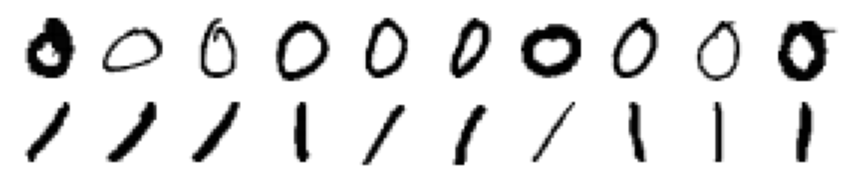

In [11]:
## Select a sample of 0 handwritten figures
pick = np.asarray(where_0)
zero_images = np.array([],dtype=np.int64).reshape(28,0)
images = [np.reshape(X_train_MNIST[:,pick[image_index]], (28,28)) for image_index in range(10)]
for image in images:
    zero_images = np.concatenate([zero_images,image], axis = 1)

## Select a sample of 1 handwritten figures
pick = np.asarray(where_1)
one_images = np.array([ ], dtype = np.int64).reshape(28,0)
images = [np.reshape(X_train_MNIST[:,pick[image_index]], (28,28)) for image_index in range(10)]
for image in images:
    one_images = np.concatenate([one_images,image], axis = 1)

## Plot
plt.figure(figsize = (15,10))
both = np.concatenate([zero_images,one_images], axis = 0)    
plt.axis("off")
plt.imshow(both, cmap = "binary")
plt.show()

## Visualizing trainable  weights: the role of weights-k-sharing and ordered partitions

In order to vizualize partitions we use the trainable weoghts saved in the folder Examples

In [12]:
parent_folder = "Examples/"

## Non-sub
train_weights_heatmaps = {}
folder_now = parent_folder + "W1S-NS/simulation1/"

with open(folder_now + "Full_model_properties.p", 'rb') as fp: Full_model_properties = pickle.load(fp)

train_weights_heatmaps["non" + "best_par_P"] = Full_model_properties["best_par_P_model"]
train_weights_heatmaps["non" + "best_par_U"] = Full_model_properties["best_par_U_model"]

If you want to check the parameters for this model you just type

In [13]:
dif_or_non_dif =["non-diffusive","diffusive"]
print(
    "\n This is a", dif_or_non_dif[Full_model_properties["par_U_model"]["eps"] != 0],\
    "PSBC model, with  weights-K-sharing = ",\
    Full_model_properties["par_U_model"]["weights_K_sharing"],\
    "and subordinate = ", Full_model_properties["par_U_model"]["subordinate"]
)


 This is a non-diffusive PSBC model, with  weights-K-sharing =  1 and subordinate =  False


And we do the same for the other cases.

In [14]:
## Sub
folder_now = parent_folder + "W1S-S/simulation1/"

with open(folder_now + "Full_model_properties.p", 'rb') as fp: Full_model_properties = pickle.load(fp)

train_weights_heatmaps["sub" + "best_par_P"] = Full_model_properties["best_par_P_model"]
train_weights_heatmaps["sub" + "best_par_U"] = Full_model_properties["best_par_U_model"]

In [15]:
parent_folder = "Examples/"
folder_now = parent_folder + "WNtS-S/simulation1/"

with open(folder_now + "Full_model_properties.p", 'rb') as fp: Full_model_properties = pickle.load(fp)

train_weights_heatmaps["kfold" + "best_par_P"] = Full_model_properties["best_par_P_model"]
train_weights_heatmaps["kfold" + "best_par_U"] = Full_model_properties["best_par_U_model"]

In [16]:
import seaborn as sns
%matplotlib inline

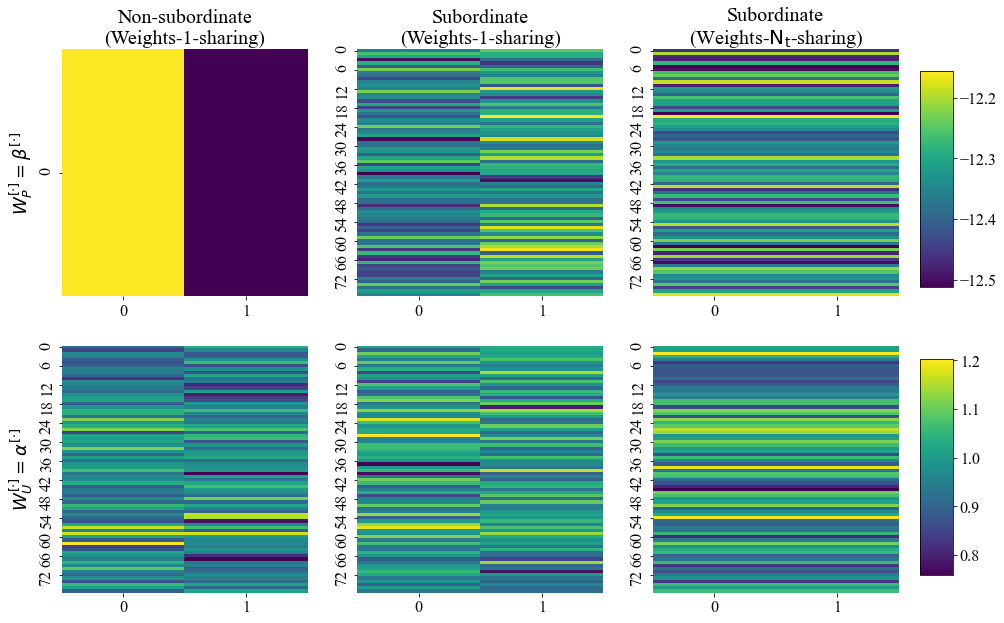

In [17]:
f, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (15,10), constrained_layout = False)

list_sub  = ("non", "sub", "kfold")
list_sub_big  = ("Non-subordinate\n(Weights-1-sharing)",\
                 "Subordinate\n(Weights-1-sharing)",\
                 "Subordinate\n"+r"(Weights-$\mathrm{N_t}$-sharing)")

m_1 = np.min(
    [train_weights_heatmaps[list_sub[i] + "best_par_P"]["alpha_x_t"].min() for i in range(3)])
M_1 = np.max(
    [train_weights_heatmaps[list_sub[i] + "best_par_P"]["alpha_x_t"].max() for i in range(3)])

for i in range(3):
    Nx = train_weights_heatmaps[list_sub[i] + "best_par_P"]["alpha_x_t"].shape[0]
    train_weights_heatmaps[str(i) + "matrix"] =\
    train_weights_heatmaps[list_sub[i] + "best_par_P"]["alpha_x_t"]
    sns.heatmap(\
                train_weights_heatmaps[str(i) + "matrix"],\
                ax = ax[0,i], vmin = m_1, vmax = M_1, cbar = False,\
                cmap = 'inferno'
               )
    pcm = ax[0,i].pcolormesh(train_weights_heatmaps[str(i) + "matrix"])
    ax[0,i].set_title(list_sub_big[i], size = 20)
    
f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([.92, .55, .03, .3])
f.colorbar(pcm, cax = cbar_ax)
    
ax[0,0].set_ylabel(r"$W_P^{[\cdot]} = \beta^{[\cdot]}$",rotation=90, size = 18)

m_2 = np.min([train_weights_heatmaps[list_sub[i] + "best_par_U"]["alpha_x_t"].min() for i in range(3)])
M_2 = np.max([train_weights_heatmaps[list_sub[i] + "best_par_U"]["alpha_x_t"].max() for i in range(3)])

for i in range(3):
    Nx = train_weights_heatmaps[list_sub[i] + "best_par_U"]["alpha_x_t"].shape[0]
    M = train_weights_heatmaps[list_sub[i] + "best_par_U"]["alpha_x_t"]
    train_weights_heatmaps[str(i) + "matrix"] = M
    
    sns.heatmap(M, ax = ax[1,i], vmin= m_2, vmax = M_2, cbar = False,cmap = 'inferno')

    pcM = ax[1,i].pcolormesh(train_weights_heatmaps[str(i) + "matrix"])
    
cbar_ax2 = f.add_axes([.92, .15, .03, .3])
f.colorbar(pcM, cax = cbar_ax2)
ax[1,0].set_ylabel(r"$W_U^{[\cdot]} = \alpha^{[\cdot]}$", rotation = 90, size = 18)
plt.show()


## Non-diffusive PSBC: some illustrative examples


Throughout the paper we discuss extensively the growth of trainable weights, which can be easily visualized  using the code in the next cell. We shall use it here a few times: first, to illustrate trainable weights growth for a **non-diffusive PSBS with weights-1-sharing, non-subordinate**:

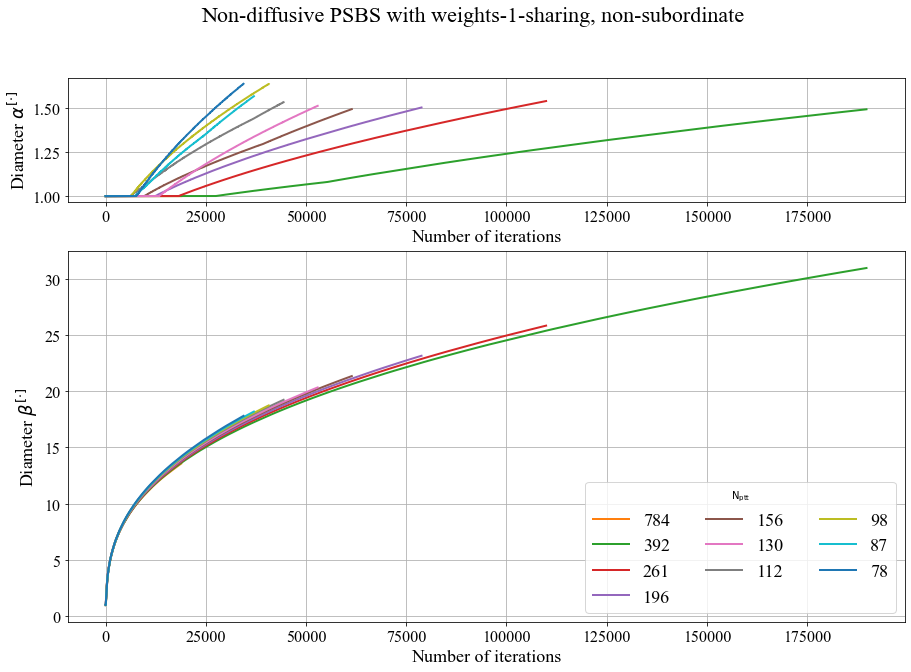

In [18]:
fig, ax = plt.subplots(figsize = (15,10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax_0 = plt.subplot(gs[0])
ax_1 = plt.subplot(gs[1])

_, value_of_parameter_varying = accuracies (parameters_MNIST_nondif, "W1S-NS", "best_accuracy_train")

param = parameters_MNIST_nondif["W1S-NS"]
for i in range(1, 11):
    param_now= param[str(i)]
    diam_hist_now = param_now['diam_hist']
    ax_0.plot(diam_hist_now["U"],  linestyle = '-',
              label = str(value_of_parameter_varying[i-1]), color = "C" + str(i) )
    ax_1.plot(\
               diam_hist_now["P"],  linestyle = '-' ,\
              label = str(value_of_parameter_varying[i-1]), color = "C" + str(i) )

ax_0.set_ylabel(r'Diameter $\alpha^{[\cdot]}$')
ax_0.set_xlabel('Number of iterations')
ax_0.grid(True)

ax_1.legend(loc = 4,  ncol = 3, title = r"$\mathrm{N_{ptt}}$")
plt.rcParams["legend.title_fontsize"] = 16
plt.rcParams["legend.columnspacing"] = .8
ax_1.set_ylabel(r'Diameter $\beta^{[\cdot]}$')
ax_1.set_xlabel('Number of iterations')
ax_1.grid(True)

fig.suptitle("Non-diffusive PSBS with weights-1-sharing, non-subordinate", fontsize = 22)
plt.show()

This is the typical case, as we can see plotting another case, for a **non-diffusive PSBS with weights-1-sharing**, this time with **subordinate phase**:

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


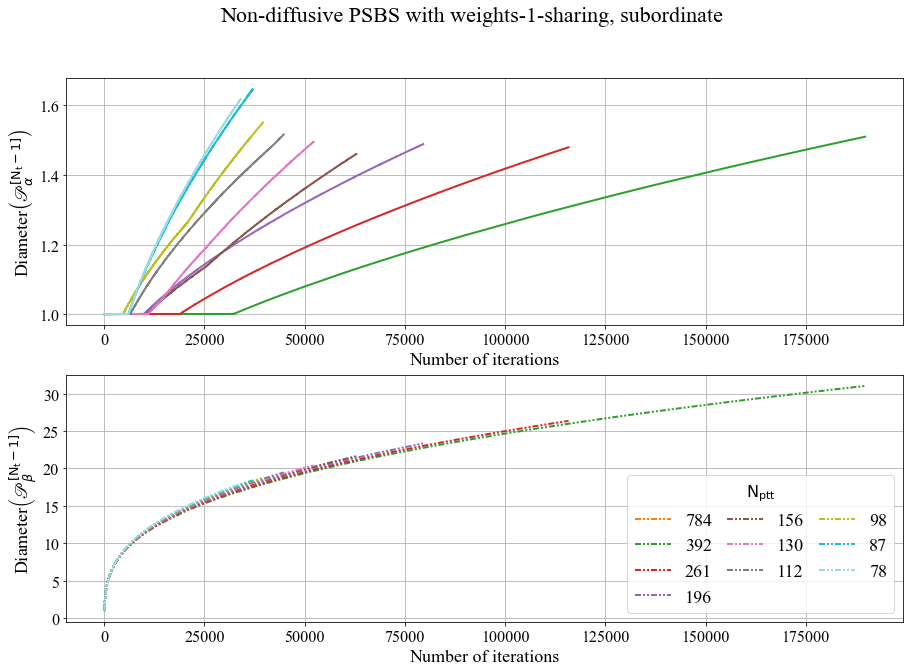

In [19]:
fig, ax = plt.subplots( nrows = 2, figsize = (15,10))

_, value_of_parameter_varying = accuracies (
    parameters_MNIST_nondif, "W1S-S", "best_accuracy_train")
param = parameters_MNIST_nondif["W1S-S"]
colors = pl.cm.tab20(np.linspace(0,1,11))

for i in range(1, 11):
    param_now= param[str(i)]
    diam_hist_now = param_now['diam_hist']
    ax[0].plot(diam_hist_now["U"],   linestyle = '-',\
               label = str(value_of_parameter_varying[i-1]), color = colors[i] )
    ax[1].plot(diam_hist_now["P"],   linestyle = (0,(3,1,1,1,1,1)),\
               label = str(value_of_parameter_varying[i-1]), color = colors[i] )


ax[0].set_ylabel(r'Diameter$\left(\mathscr{P}_{\alpha}^{[\mathrm{N_t}-1]}\right)$')
ax[0].set_xlabel('Number of iterations')
ax[0].grid(True)

ax[1].legend(loc = 4,  ncol = 3, title = r"$\mathrm{N_{ptt}}$")
plt.rcParams["legend.title_fontsize"] = 16
plt.rcParams["legend.columnspacing"] = .8
ax[1].set_ylabel(r'Diameter$\left(\mathscr{P}_{\beta}^{[\mathrm{N_t}-1]}\right)$')
ax[1].set_xlabel('Number of iterations')
ax[1].grid(True)
fig.suptitle("Non-diffusive PSBS with weights-1-sharing, subordinate", fontsize = 22)

plt.show()

To plot the accuracy we can use the following code, which has been used (up to some necessary modifications) in Figures 16, 17, and 19 of the paper

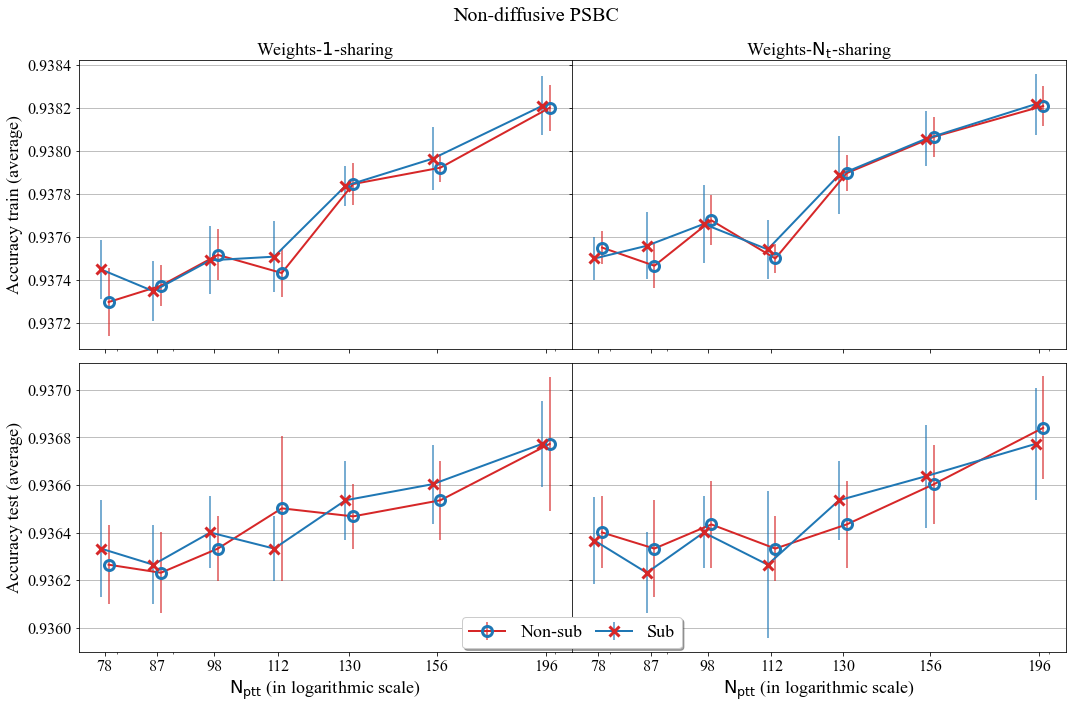

In [20]:
A_train_1NS, value_of_parameter_varying = accuracies (
    parameters_MNIST_nondif, "W1S-NS", "best_accuracy_train")
value_of_parameter_varying = value_of_parameter_varying[::-1]
value_of_parameter_varying = np.asarray(value_of_parameter_varying)


average_train_1NS = np.mean(A_train_1NS, axis = 1)[::-1]
stdev_train_1NS = np.std(A_train_1NS, axis = 1)[::-1]

A_train_1S, _ = accuracies (
    parameters_MNIST_nondif, "W1S-S", "best_accuracy_train")
average_train_1S = np.mean(A_train_1S, axis = 1)[::-1]
stdev_train_1S = np.std(A_train_1S, axis = 1)[::-1]

A_train_NS, _ = accuracies (
    parameters_MNIST_nondif, "WNtS-NS", "best_accuracy_train")
average_train_NS = np.mean(A_train_NS, axis = 1)[::-1]
stdev_train_NS = np.std(A_train_NS, axis = 1)[::-1]

A_train_S, _ = accuracies (
    parameters_MNIST_nondif, "WNtS-S", "best_accuracy_train")
average_train_S = np.mean(A_train_S, axis = 1)[::-1]
stdev_train_S = np.std(A_train_S, axis = 1)[::-1]

colors = pl.cm.tab10(np.linspace(0,1,9))
colors_markers = pl.cm.tab10(np.linspace(0,1,9))

# Some plotting parameters
col_NS, mk_NS, alpha_for_all, L, T = 0, 1, 0.6, -3, .008

fig,ax = plt.subplots(
     nrows =  2, ncols = 2, figsize = (15,10), sharey = 'row',  sharex = 'col',\
   gridspec_kw = {'wspace':0},    constrained_layout = False
)

markers, caps, bars = ax[0,0].errorbar(
    (1 + T)*value_of_parameter_varying[:L], average_train_1NS[:L], marker = 'o',\
    yerr = stdev_train_1NS[:L], errorevery = 1, linestyle = '-',\
    label = "Non Sub", color = colors[col_NS+3],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS-1]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[0,0].errorbar(
    (1/(1 + T))*value_of_parameter_varying[:L], average_train_1S[:L], marker = 'x',   \
    yerr = stdev_train_1S[:L], errorevery = 1, linestyle = '-',\
    label = "Sub", color = colors[col_NS],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS+2]    
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[0,1].errorbar(
    (1 + T)*value_of_parameter_varying[:L], average_train_NS[:L], marker = 'o',\
    yerr = stdev_train_NS[:L], errorevery = 1, linestyle = '-',\
    label = "Non Sub", color = colors[col_NS+3],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS-1]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[0,1].errorbar(
    (1/(1 + T))*value_of_parameter_varying[:L], average_train_S[:L], marker = 'x',   \
    yerr = stdev_train_S[:L], errorevery = 1, linestyle = '-',\
    label = "Sub", color = colors[col_NS],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS+2]    
)
[bar.set_alpha(alpha_for_all) for bar in bars]

A_test_1NS, _ = accuracies (parameters_MNIST_nondif, "W1S-NS", "best_accuracy_test")
average_test_1NS = np.mean(A_test_1NS, axis = 1)[::-1]
stdev_test_1NS = np.std(A_test_1NS, axis = 1)[::-1]

A_test_1S, _ = accuracies (parameters_MNIST_nondif, "W1S-S", "best_accuracy_test")
average_test_1S = np.mean(A_test_1S, axis = 1)[::-1]
stdev_test_1S = np.std(A_test_1S, axis = 1)[::-1]

A_test_NS, _ = accuracies (parameters_MNIST_nondif, "WNtS-NS", "best_accuracy_test")
average_test_NS = np.mean(A_test_NS, axis = 1)[::-1]
stdev_test_NS = np.std(A_test_NS, axis = 1)[::-1]

A_test_S, _ = accuracies (parameters_MNIST_nondif, "WNtS-S", "best_accuracy_test")
average_test_S = np.mean(A_test_S, axis = 1)[::-1]
stdev_test_S = np.std(A_test_S, axis = 1)[::-1]

markers, caps, bars = ax[1,0].errorbar(
    (1 + T)*value_of_parameter_varying[:L], average_test_1NS[:L], marker = 'o', \
    yerr = stdev_test_1NS[:L], errorevery = 1, linestyle = '-',\
    label = "Non Sub", color = colors[col_NS+3],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS-1]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[1,0].errorbar(
    (1/(1 + T))*value_of_parameter_varying[:L], average_test_1S[:L], marker = 'x',\
    yerr = stdev_test_1S[:L], errorevery = 1,  linestyle = '-',\
    label = "Sub", color = colors[col_NS],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS+2]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[1,1].errorbar(
    (1 + T)*value_of_parameter_varying[:L], average_test_NS[:L], marker = 'o', \
    yerr = stdev_test_NS[:L], errorevery = 1, linestyle = '-',\
    label = "Non-sub", color = colors[col_NS+3],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS-1]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

markers, caps, bars = ax[1,1].errorbar(
    (1/(1 + T))*value_of_parameter_varying[:L], average_test_S[:L], marker = 'x',\
    yerr = stdev_test_S[:L], errorevery = 1,  linestyle = '-',\
    label = "Sub", color = colors[col_NS],\
    fillstyle = 'none', markeredgecolor = colors_markers[mk_NS+2]
)
[bar.set_alpha(alpha_for_all) for bar in bars]

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].grid(axis = "y")
        ax[i,j].set_xscale('log') 
        ax[i,j].set_xticks(np.asarray(value_of_parameter_varying[:L]))
        ax[i,j].tick_params("x")
        ax[i,j].get_xaxis().set_major_formatter(ScalarFormatter())
        ax[i,j].xaxis.set_minor_formatter(plt.matplotlib.ticker.NullFormatter())

ax[0,0].set_title(r"Weights-$1$-sharing", size = 18)  
ax[0,0].set_ylabel("Accuracy train (average)")   

ax[0,1].set_title(r"Weights-$\mathrm{N_t}$-sharing", size = 18)  

ax[1,0].set_ylabel("Accuracy test (average)")
ax[1,0].set_xlabel(r"$\mathrm{N_{ptt}}$ (in logarithmic scale)")

ax[1,1].set_xlabel(r"$\mathrm{N_{ptt}}$ (in logarithmic scale)")
chartBox = ax[1,1].get_position()
ax[1,1].set_position([chartBox.x0, chartBox.y0, chartBox.width*0.2, chartBox.height])
ax[1,1].legend(loc = 'upper center', bbox_to_anchor = (0, 0.15), shadow = True, ncol = 4)

fig.set_tight_layout({'rect': [0, 0, 1, 0.95]})
fig.suptitle("Non-diffusive PSBC", size = 20)

plt.show()

>**Remark (shifting errorbars in log scale):** when plotting errorbars, sometimes it is necessary to shift them, otherwise they sit on top of each other. The idea is then to shift each plot by an appropriate multiple of a quantity (say, $\eta$), so they don't get cluttered. There is however aminor detail when you plot errorbars in log scale: instead of ,multiplication you have to multiply each axis by powers of (1 + 
$\epsilon$).

## Diffusive PSBC: some illustrative examples

Last, we plot some examples of diffusive models. Most of the code for plotting has already been given, so I'll plot other things here, or plot them in a different way than that given in the paper. 

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


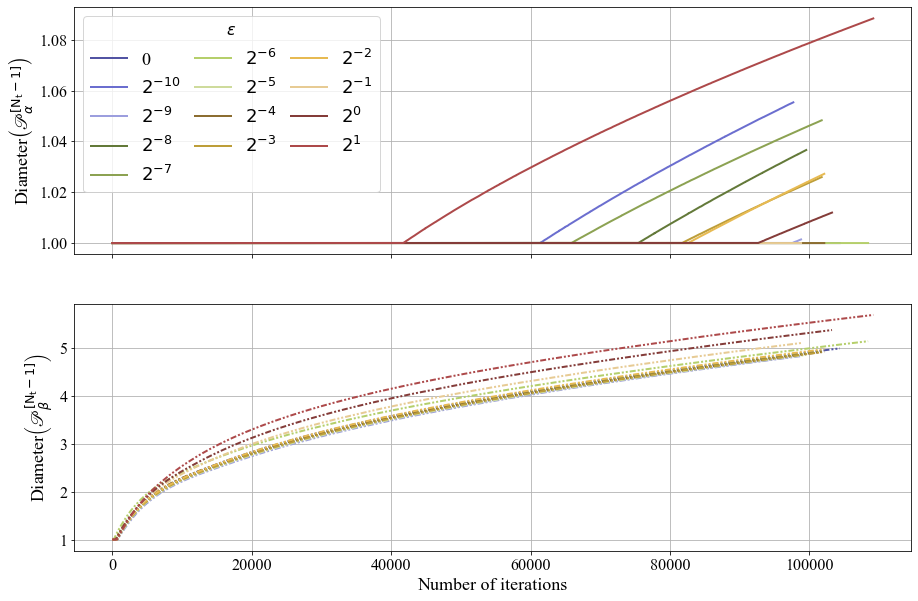

In [21]:
def test_label_value_of_parameter_varying(x):
    """Auxiliar function to get the labels in powers of 2 notation"""
    if x == 0:
        return "0"
    j = int(np.ceil(np.log2(x))) 
    return r'$2^{{{0}}}$'.format(j)

fig, ax = plt.subplots( nrows = 2, figsize = (15,10), sharex = 'col')

_, value_of_parameter_varying =accuracies (
    parameters_MNIST_Neumann, "W1S-Nt8", "best_accuracy_train", number_folders = 13
)

colors = pl.cm.tab20b(np.linspace(0,1,20))
param = parameters_MNIST_Neumann["W1S-Nt8"]
for i in range(1, 14):
    param_now= param[str(i)]
    diam_hist_now = param_now['diam_hist']
    ax[0].plot(
        diam_hist_now["U"],   linestyle = '-',\
        label = str(test_label_value_of_parameter_varying(value_of_parameter_varying[i-1])),\
        color = colors[i]
    )
    ax[1].plot(
        diam_hist_now["P"],   linestyle = (0,(3,1,1,1,1,1)),\
        label = str(test_label_value_of_parameter_varying(value_of_parameter_varying[i-1])),\
        color = colors[i]
    )

ax[0].set_ylabel(r'Diameter$\left(\mathscr{P}_{\alpha}^{[\mathrm{N_t}-1]}\right)$')
ax[0].grid(True)
ax[0].legend(loc = 2,  ncol = 3, title = r"$\varepsilon$")
plt.rcParams["legend.title_fontsize"] = 16
plt.rcParams["legend.columnspacing"] = .8

ax[1].set_ylabel(r'Diameter$\left(\mathscr{P}_{\beta}^{[\mathrm{N_t}-1]}\right)$')
ax[1].set_xlabel('Number of iterations')
ax[1].grid(True)

plt.show()

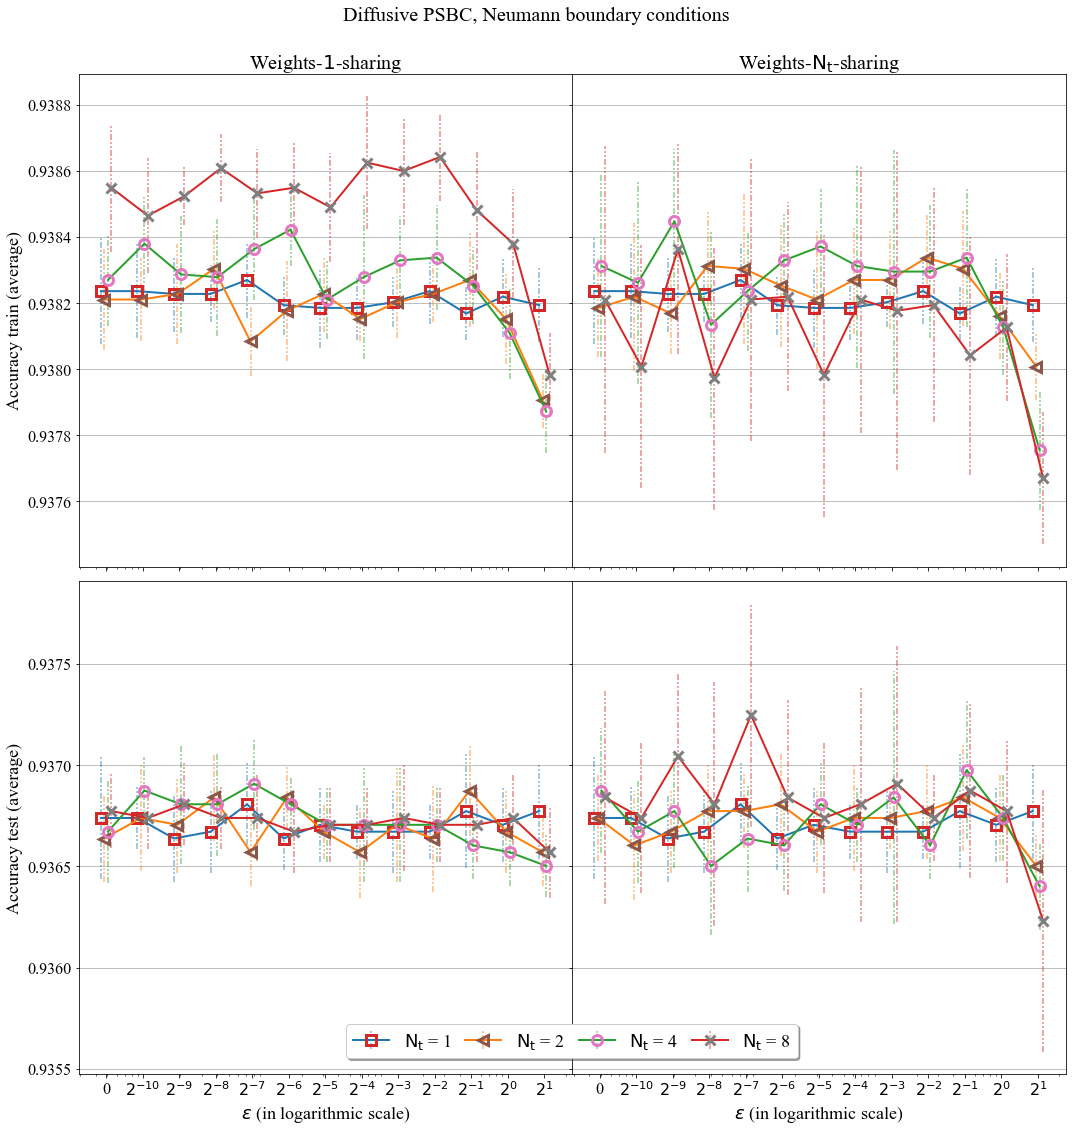

In [22]:
def test_label(x,val):
    """Auxiliar function to get the labels in powers of 2 notation"""
    if x ==  1./np.power(2,11):
        return "0"
    j = int(np.ceil(np.log2(x))) 
    return r'$2^{{{0}}}$'.format(j)

fig,ax = plt.subplots(
     nrows =  2, ncols = 2, figsize = (15,16), sharey = 'row', sharex = 'col',\
    gridspec_kw = {'wspace':0},    constrained_layout = False
)

L, T = None, 1.068
T_vec = {"1" : np.power(T,-3/2), "2" : np.power(T,-1/2), "4" : np.power(T,1/2), "8" : np.power(T,3/2)}

mk_vary = 2

colors = pl.cm.tab20(np.linspace(0,1,20))
colors_markers = pl.cm.tab10(np.linspace(0,1,9))

alpha_for_all = 0.4

markers_dic_Nt = {"1" : "s", "2" : "<", "4" : "o", "8" : "x"}
markers_dic_1 = {"1" : "s", "2" : "<", "4" : "o", "8" : "x"}
markers_color = {"1" : 0, "2" : 1, "4" : 2, "8" : 3}
min_y = max_y = min_y_tes = max_y_test = 0
ncol  = nrow = 0

for i in [1 ,2, 4, 8]:

    #### Train
    
    ### weights-1-sharing
    A_train, value_of_parameter_varying = accuracies (
        parameters_MNIST_Neumann, "W1S-Nt" + str(i), "best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)
    stdev_train = np.std(A_train, axis = 1)
    value_of_parameter_varying = value_of_parameter_varying
    value_of_parameter_varying = np.asarray(value_of_parameter_varying)
    
    if i == 1:
        min_y = np.copy(min(average_train - stdev_train))
        max_y = np.copy(max(average_train + stdev_train))
    else:
        min_y = np.copy(min(min(average_train - stdev_train), min_y))
        max_y = np.copy(max(max(average_train + stdev_train), max_y))

    value_of_parameter_varying[0] = 1./np.power(2,11)
    
    markers, caps, bars = ax[0,0].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = "Nt" + str(i), yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[2 * markers_color[str(i)]], marker = markers_dic_1[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[0,0].set_ylabel("Accuracy train (average)")
    ax[0,0].set_title(r"Weights-$1$-sharing", size = 20)
    ax[0,0].set_xscale('log') 

    ### weights-Nt-sharing
    A_train, _ = accuracies (
        parameters_MNIST_Neumann, "WNtS-Nt" + str(i),"best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)#[::-1]
    stdev_train = np.std(A_train, axis = 1)#[::-1]

    if i == 1:
        min_y = np.copy(min(average_train - stdev_train))
        max_y = np.copy(max(average_train + stdev_train))
    else:
        min_y = np.copy(min(min(average_train - stdev_train), min_y))
        max_y = np.copy(max(max(average_train + stdev_train), max_y))

    markers, caps, bars =  ax[0,1].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = r"$\mathrm{N_t}$" + str(i), yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[2 * markers_color[str(i)]], marker = markers_dic_Nt[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[0,1].set_title(r"Weights-$\mathrm{N_t}$-sharing", size = 20)
#    ax[0,1].grid(axis = "y")
    ax[0,1].set_xscale('log') 
    
    ###################################################################################################
    #### Tests
    
    ### weights-1-sharing
    A_test, _ = accuracies (
        parameters_MNIST_Neumann, "W1S-Nt" + str(i),"best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)#[::-1]
    stdev_test = np.std(A_test, axis = 1)#[::-1]
    
    if i == 1:
        min_y_test = np.copy(min(average_test - stdev_test))
        max_y_test = np.copy(max(average_test + stdev_test))
    else:
        min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
        max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,0].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_test[:L],\
        label = r"$\mathrm{N_t}$ = " + str(i), yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_1[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
        
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[1,0].set_ylabel("Accuracy test (average)")
    ax[1,0].grid(axis = "y")
    ax[1,0].set_xscale('log') 

    ### weights-Nt-sharing
    A_test, _ = accuracies (
        parameters_MNIST_Neumann, "WNtS-Nt" + str(i), "best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)#[::-1]
    stdev_test = np.std(A_test, axis = 1)#[::-1]

    if i == 1:
        min_y_test = np.copy(min(average_test - stdev_test))
        max_y_test = np.copy(max(average_test + stdev_test))
    else:
        min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
        max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,1].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_test[:L],\
        label = r"$\mathrm{N_t}$ = " + str(i), yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_Nt[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]
    ax[1,1].set_xscale('log') 

for i,j in it.product([0,1],[0,1]) :
    ax[i,j].set_xticks(value_of_parameter_varying[:L])
    ax[i,j].get_xaxis().set_major_formatter(ScalarFormatter())
    ax[i,j].xaxis.set_major_formatter(FuncFormatter(test_label))
    ax[i,j].grid(axis = "y")

ax[1,0].set_xlabel(r"$\varepsilon$ (in logarithmic scale)")
ax[1,1].set_xlabel(r"$\varepsilon$ (in logarithmic scale)")

### Shifting the legend
chartBox = ax[1,1].get_position()
ax[1,1].set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax[1,1].legend(loc = 'upper center', bbox_to_anchor = (0, 0.12), shadow = True, ncol = 4)
fig.set_tight_layout({'rect': [0, 0, 1, 0.95]})
fig.suptitle("Diffusive PSBC, Neumann boundary conditions", size = 20)

plt.show()

Neet to change the order


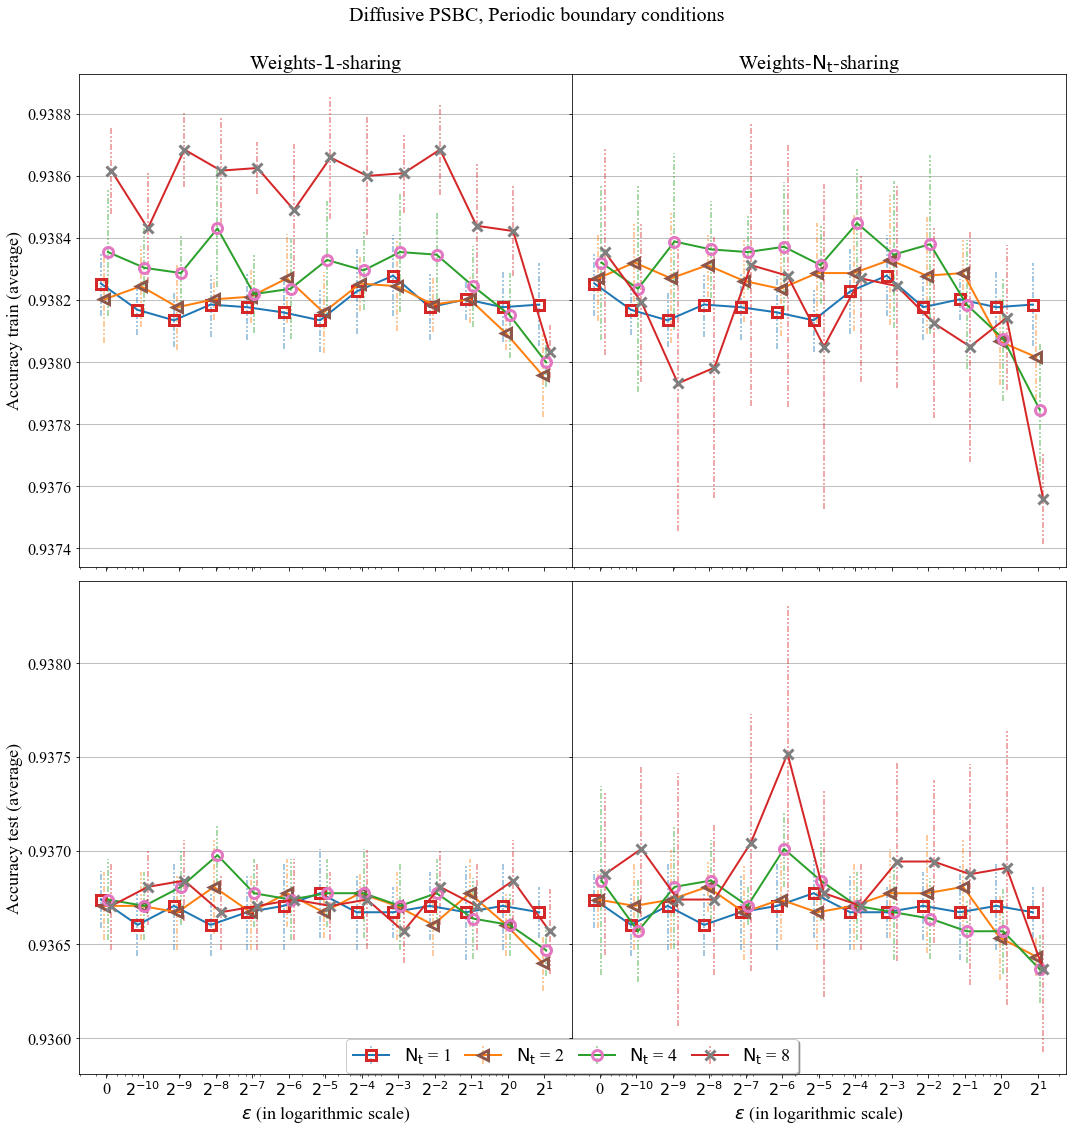

In [23]:
def test_label(x,val):
    """Auxiliar function to get the labels in powers of 2 notation"""
    if x ==  1./np.power(2,11):
        return "0"
    j = int(np.ceil(np.log2(x))) 
    return r'$2^{{{0}}}$'.format(j)

fig,ax = plt.subplots(
     nrows =  2, ncols = 2, figsize = (15,16), sharey = 'row', sharex = 'col',\
    gridspec_kw = {'wspace':0},    constrained_layout = False  
)

# Some plotting parameters
L, T, mk_vary, alpha_for_all = None, 1.068, 2, 0.4
min_y = max_y = min_y_tes = max_y_test = 0
ncol  = nrow = 0

T_vec = {"1" : np.power(T,-3/2), "2" : np.power(T,-1/2), "4" : np.power(T,1/2), "8" : np.power(T,3/2)}
colors = pl.cm.tab20(np.linspace(0,1,20))
colors_markers = pl.cm.tab10(np.linspace(0,1,9))

markers_dic_Nt = {"1" : "s", "2" : "<", "4" : "o", "8" : "x"}
markers_dic_1 = {"1" : "s", "2" : "<", "4" : "o", "8" : "x"}
markers_color = {"1" : 0, "2" : 1, "4" : 2, "8" : 3}

for i in [1, 2, 4, 8]:

    #### Train
    ### weights-1-sharing
    A_train, value_of_parameter_varying = accuracies (
        parameters_MNIST_Periodic, "Per_W1S-Nt" + str(i),"best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)
    stdev_train = np.std(A_train, axis = 1)
    value_of_parameter_varying = value_of_parameter_varying
    value_of_parameter_varying = np.asarray(value_of_parameter_varying)
    
    if i == 1:
        min_y = np.copy(min(average_train - stdev_train))
        max_y = np.copy(max(average_train + stdev_train))
    else:
        min_y = np.copy(min(min(average_train - stdev_train), min_y))
        max_y = np.copy(max(max(average_train + stdev_train), max_y))

    value_of_parameter_varying[0] = 1./np.power(2,11)
    
    markers, caps, bars = ax[0,0].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = r"$\mathrm{N_t}$" + str(i), yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_1[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary + markers_color[str(i)] + 1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[0,0].set_ylabel("Accuracy train (average)")
    ax[0,0].set_title(r"Weights-$1$-sharing", size = 20)
    ax[0,0].set_xscale('log') 

    ### weights-Nt-sharing
    A_train, _ = accuracies (
        parameters_MNIST_Periodic, "Per_WNtS-Nt" + str(i),"best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)
    stdev_train = np.std(A_train, axis = 1)

    if i == 1:
        min_y = np.copy(min(average_train - stdev_train))
        max_y = np.copy(max(average_train + stdev_train))
    else:
        min_y = np.copy(min(min(average_train - stdev_train), min_y))
        max_y = np.copy(max(max(average_train + stdev_train), max_y))

    markers, caps, bars =  ax[0,1].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = r"$\mathrm{N_t}$" + str(i), yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_Nt[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[0,1].set_title(r"Weights-$\mathrm{N_t}$-sharing", size = 20)
    ax[0,1].set_xscale('log') 
    
    ###################################################################################################
    #### Tests
    ### weights-1-sharing

    A_test, _ = accuracies (
        parameters_MNIST_Periodic, "Per_W1S-Nt" + str(i),"best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)#[::-1]
    stdev_test = np.std(A_test, axis = 1)#[::-1]
    
    if i == 1:
        min_y_test = np.copy(min(average_test - stdev_test))
        max_y_test = np.copy(max(average_test + stdev_test))
    else:
        min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
        max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,0].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_test[:L],\
        label = "r$\mathrm{N_t}$ = " + str(i), yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_1[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ax[1,0].set_ylabel("Accuracy test (average)")
    ax[1,0].set_xscale('log') 

    ### weights-Nt-sharing
    A_test, _ = accuracies (
        parameters_MNIST_Periodic, "Per_WNtS-Nt" + str(i),"best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)
    stdev_test = np.std(A_test, axis = 1)

    if i == 1:
        min_y_test = np.copy(min(average_test - stdev_test))
        max_y_test = np.copy(max(average_test + stdev_test))
    else:
        min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
        max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,1].errorbar(
        T_vec[str(i)] * value_of_parameter_varying[:L], average_test[:L],\
        label = "$\mathrm{N_t}$ = " + str(i), yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[2*markers_color[str(i)]], marker = markers_dic_Nt[str(i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(i)]+1], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]
    ax[1,1].set_xscale('log') 

for i,j in it.product([0,1],[0,1]) :
    ax[i,j].set_xticks(value_of_parameter_varying[:L])
    ax[i,j].get_xaxis().set_major_formatter(ScalarFormatter())
    ax[i,j].xaxis.set_major_formatter(FuncFormatter(test_label))
    ax[i,j].grid(axis = "y")

ax[1,0].set_xlabel(r"$\varepsilon$ (in logarithmic scale)")
ax[1,1].set_xlabel(r"$\varepsilon$ (in logarithmic scale)")

### Shifting the legend
chartBox = ax[1,1].get_position()
ax[1,1].set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax[1,1].legend(loc = 'upper center', bbox_to_anchor = (0, 0.09), shadow = True, ncol = 4)
    
fig.set_tight_layout({'rect': [0, 0, 1, 0.95]})
fig.suptitle("Diffusive PSBC, Periodic boundary conditions", size = 20)
plt.show()

## Plotting the evolution of maximum values of trainable weights

Last, we generate a plot for the graph of the maximum diameter over epochs. The graph in the paper is a variation of this. Before we start, a remark


>**REMARK 1:** whenever we study partition cardinality variation, it is useful to flip the order of the outputs of the function "accuracies". That's because of the way folders are organized in the case of Non-diffusive model: each has an extension K which is a number from 0 to 10, each of which corresponds to a value of N_{ptt}: 786, 392 etc, a relation that is decreasing. In order to make plots correct it is necessary to flip the "x" axis.  You can see that by printing "value_of_parameter_varying" at the end of the next code

>**REMARK 2:** the next code can be simplified a lot. We will keep it here because from it you can redo the plots in the figures used in the paper.


In [24]:
M = []
column = []

average_alpha_dic, stdev_alpha_dic = {}, {}
average_beta_dic, stdev_beta_dic = {}, {}
value_of_parameter_varying = []
list_of_keys = ["W1S-NS", "W1S-S", "WNtS-NS", "WNtS-S"]

for dict_now in list_of_keys:
    param_now = parameters_MNIST_nondif[dict_now]
    average_alpha, stdev_alpha = [], []
    average_beta, stdev_beta = [], []

    for i in param_now.keys():
    #### -------------------------------------------
        A_alpha = param_now[i]["max_alpha"]

        if dict_now=="W1S-NS": value_of_parameter_varying.append(param_now[i]["value_of_parameter_varying"])
        
        average_alpha = np.append(average_alpha, (np.mean(A_alpha, axis = 1)))
        stdev_alpha = np.append(stdev_alpha, np.std(A_alpha, axis = 1))
        A_beta = param_now[i]["max_beta"]
        average_beta = np.append(average_beta, np.mean(A_beta, axis = 1))
        stdev_beta = np.append(stdev_beta, np.std(A_beta, axis = 1))

    average_alpha_dic[dict_now] = average_alpha[::-1]
    stdev_alpha_dic[dict_now] =  stdev_alpha[::-1]
    average_beta_dic[dict_now] = average_beta[::-1]
    stdev_beta_dic[dict_now] =  stdev_beta[::-1]

Due to Remark 1, we do

In [25]:
value_of_parameter_varying = np.asarray(value_of_parameter_varying)[::-1] 
print(value_of_parameter_varying)

[ 78  87  98 112 130 156 196 261 392 784]


Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


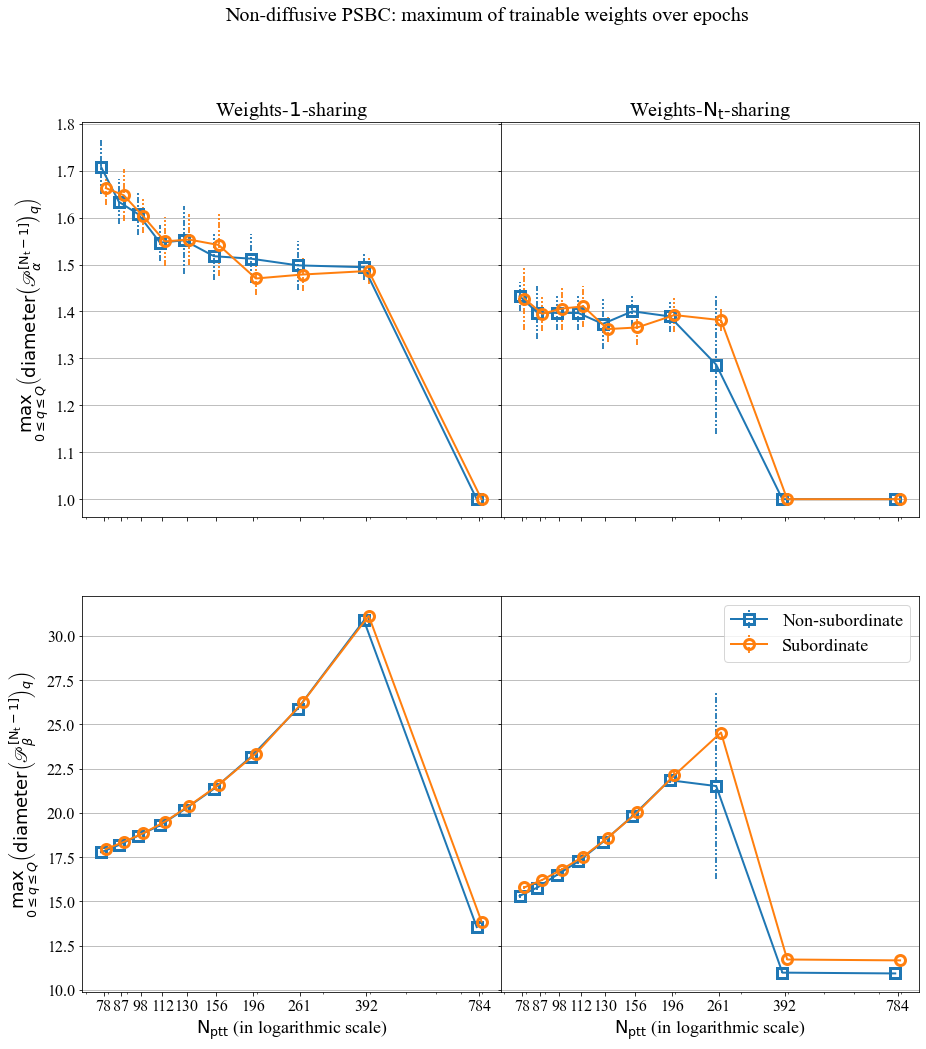

In [26]:
fig,ax = plt.subplots(
     nrows =  2, ncols = 2, figsize = (15,16), sharey = 'row', sharex = 'col',\
    gridspec_kw = {'wspace':0},    constrained_layout = False 
)

label_tags = ["Non-subordinate", "Subordinate"]

# Some plotting parameters
L, T, mk_vary = None, 1.03, 0
min_y = max_y = min_y_tes = max_y_test = 0
ncol  = nrow = 0

T_vec = {"0" : np.power(T,-1/2), "1" : np.power(T,-1/2), "2" : np.power(T,1/2), "3" : np.power(T,1/2)}

colors = pl.cm.tab20(np.linspace(0,1,10))
colors_markers = pl.cm.tab10(np.linspace(0,1,9))
alpha_for_all = 0.9

markers_dic_Nt = {"0" : "s", "0" : "s", "2" : "o", "3" : "o"}
markers_dic_1 = {"0" : "s", "1" : "s", "2" : "o", "3" : "o"}
markers_color = {"0" : 0, "1" : 0, "2" : 1, "3" : 1}

for i in [0,1]:  #  when i = 0, only NS; otherwise subordinate models only
    ### Weights-1-sharing  
    average_train, stdev_train = average_alpha_dic[list_of_keys[i]], stdev_alpha_dic[list_of_keys[i]]

    if i == 0:
        min_y = np.copy(min(average_train - stdev_train))
        max_y = np.copy(max(average_train + stdev_train))
    else:
        min_y = np.copy(min(min(average_train - stdev_train), min_y))
        max_y = np.copy(max(max(average_train + stdev_train), max_y))
 
    markers, caps, bars = ax[0,0].errorbar(
        T_vec[str(2 * i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = None, yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[markers_color[str(2 * i)]], marker = markers_dic_1[str(2 * i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(2 * i)]], \
        fillstyle = 'none'        
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]


    ### weights-NT-sharing 
    average_train = average_alpha_dic[list_of_keys[i+2]]
    stdev_train = stdev_alpha_dic[list_of_keys[i+2]]

    min_y = np.copy(min(min(average_train - stdev_train), min_y))
    max_y = np.copy(max(max(average_train + stdev_train), max_y))

    markers, caps, bars =  ax[0,1].errorbar(
        T_vec[str(2 * i)] * value_of_parameter_varying[:L], average_train[:L],\
        label = None, yerr = stdev_train[:L], errorevery = 1, linestyle = '-',\
        color = colors[markers_color[str(2 * i)]], marker = markers_dic_1[str(2 * i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(2 * i)]], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ###################################################################################################
    ### weights-Nt-sharing - Non-subordinate

    average_test = average_beta_dic[list_of_keys[i]]
    stdev_test = stdev_beta_dic[list_of_keys[i]]

    if i == 0:
        min_y_test = np.copy(min(average_test - stdev_test))
        max_y_test = np.copy(max(average_test + stdev_test))
    else:
        min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
        max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,0].errorbar(
        T_vec[str(2 * i)] * value_of_parameter_varying[:L], average_test[:L],\
        label = None, yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[markers_color[str(2 * i)]], marker = markers_dic_1[str(2 * i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(2 * i)]], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

    ### weights-Nt-sharing - Subordinate
    average_test, stdev_test = average_beta_dic[list_of_keys[i+2]], stdev_beta_dic[list_of_keys[i+2]]

    min_y_test = np.copy(min(min(average_test - stdev_test), min_y_test))
    max_y_test = np.copy(max(max(average_test + stdev_test), max_y_test))

    markers, caps, bars =  ax[1,1].errorbar(
        T_vec[str(2 * i)] * value_of_parameter_varying[:L], average_test[:L],\
        label =  label_tags[i], yerr = stdev_test[:L], errorevery = 1, linestyle = '-',\
        color = colors[markers_color[str(2 * i)]],\
        marker = markers_dic_1[str(2 * i)], \
        markerfacecolor = None,  markeredgecolor = colors_markers[mk_vary +markers_color[str(2 * i)]], \
        fillstyle = 'none'
    )
    [bar.set_alpha(alpha_for_all) for bar in bars]
    [bar.set_linestyle((0,(3,1,1,1,1,1))) for bar in bars]

# Titles
ax[0,0].set_title(r"Weights-$1$-sharing", size = 20)
ax[0,1].set_title(r"Weights-$\mathrm{N_t}$-sharing", size = 20)
# y-labels
ax[0,0].set_ylabel(
    r'$\max_{0\leq q \leq Q}\left(\mathrm{diameter}\left(\mathscr{P}_{\alpha}^{[\mathrm{N_t}-1]}\right)_q\right)$'
)
ax[1,0].set_ylabel(
    r'$\max_{0\leq q \leq Q}\left(\mathrm{diameter}\left(\mathscr{P}_{\beta}^{[\mathrm{N_t}-1]}\right)_q\right)$'
)
# x-labels
ax[1,0].set_xlabel(r"$\mathrm{N_{ptt}}$ (in logarithmic scale)")
ax[1,1].set_xlabel(r"$\mathrm{N_{ptt}}$ (in logarithmic scale)")

fig.suptitle(r"Non-diffusive PSBC: maximum of trainable weights over epochs", size = 20)

ax[1,1].legend()

for j in [0,1]:
    for i in [0,1]:
        ax[i,j].grid(axis = "y")
        ax[i,j].tick_params("x")
        ax[i,j].set_xscale("log") 
        ax[i,j].set_xticks(value_of_parameter_varying)        
        ax[i,j].get_xaxis().set_major_formatter( ScalarFormatter() )
plt.show()

Which corresponds to a visualization of the data in Table 4 of the supplementary material.

# Some tables

There are two types of statistics that we are interested at:

   1. $\ell^{\infty}$  norm of trainable weights ($W_U$ and $W_P$)
   2. Accuracies
   
We shall do only a few cases: statistics for other model parameters can be rederived in a similar fashion.
    
## Statistics for the non-diffusive PSBC:    

Before we start, you will note that we flip some vector whenever we are talking about $\mathrm{N_{ptt}}$. That's because of the way folders are organized. See Remark 1 above.

In [27]:
# Weights-1-sharing
A_train_1NS, _ = accuracies (parameters_MNIST_nondif, "W1S-NS", "best_accuracy_train")
A_train_1S, _ = accuracies (parameters_MNIST_nondif, "W1S-S", "best_accuracy_train")
A_test_1NS, _ = accuracies (parameters_MNIST_nondif, "W1S-NS", "best_accuracy_test")
A_test_1S, _ = accuracies (parameters_MNIST_nondif, "W1S-S", "best_accuracy_test")

# Weights-Nt-sharing
A_train_NS, _ = accuracies (parameters_MNIST_nondif, "WNtS-NS", "best_accuracy_train")
A_train_S, _ = accuracies (parameters_MNIST_nondif, "WNtS-S", "best_accuracy_train")
A_test_NS, _ = accuracies (parameters_MNIST_nondif, "WNtS-NS", "best_accuracy_test")
A_test_S, _ = accuracies (parameters_MNIST_nondif, "WNtS-S", "best_accuracy_test")

get the parameters first

In [28]:
parameters_MNIST_nondif["W1S-NS"]["1"]["data"]

{'Nx': 784,
 'eps': 0,
 'dt': 0.1,
 'Nt': 2,
 'ptt_cardnlty': 784,
 'weights_K_sharing': 1,
 'Neumann': True,
 'patience': 50,
 'drop_SGD': 0.95,
 'batch_size': 32,
 'epochs': 600,
 'subordinate': False,
 'with_phase': True,
 'what_is_varying': 'partition_cardinality'}

Recall, from Remark 1, that we have to flip the accuracies to get the right label (because of the decreasing association between folder numbers and $\mathrm{N_{ptt}}$

In [29]:
M = []

average_train_NS = np.mean(A_train_1NS, axis = 1)[::-1]
stdev_train_NS = np.std(A_train_1NS, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_train_NS, stdev_train_NS )]
column = ["W1S-NS train: average +std"]
M.append(row)

average_test_NS = np.mean(A_test_1NS, axis = 1)[::-1]
stdev_test_NS = np.std(A_test_NS, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_test_NS, stdev_test_NS )]
column.append("W1S-NS test: average +std")
M.append(row)

average_train_S = np.mean(A_train_1S, axis = 1)[::-1]
stdev_train_S = np.std(A_train_S, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_train_S, stdev_train_S )]
column.append("W1S-S train: average +std")
M.append(row)

average_test_S = np.mean(A_test_1S, axis = 1)[::-1]
stdev_test_S = np.std(A_test_S, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_test_S, stdev_test_S )]
column.append("W1S-S test: average +std")
M.append(row)

In [30]:
g = pd.DataFrame(np.squeeze(M).T)
g.columns = column
g.index = value_of_parameter_varying
g

,W1S-NS train: average +std,W1S-NS test: average +std,W1S-S train: average +std,W1S-S test: average +std
78,0.9373 + 0.00016,0.93627 + 0.00015,0.93745 + 0.0001,0.93633 + 0.00018
87,0.93737 + 9e-05,0.93623 + 0.0002,0.93735 + 0.00016,0.93627 + 0.00017
98,0.93752 + 0.00012,0.93633 + 0.00018,0.93749 + 0.00018,0.9364 + 0.00015
112,0.93743 + 0.00011,0.9365 + 0.00014,0.93751 + 0.00014,0.93633 + 0.00031
130,0.93785 + 0.0001,0.93647 + 0.00018,0.93784 + 0.00018,0.93654 + 0.00017
156,0.93792 + 7e-05,0.93654 + 0.00017,0.93797 + 0.00013,0.9366 + 0.00022
196,0.9382 + 0.00011,0.93677 + 0.00022,0.93821 + 0.00014,0.93677 + 0.00024
261,0.93839 + 8e-05,0.93698 + 0.18258,0.93838 + 0.00019,0.93684 + 0.00067
392,0.9385 + 6e-05,0.93694 + 0.0,0.93852 + 0.0,0.93694 + 0.0
784,0.46355 + 0.0,0.48106 + 0.0,0.46355 + 0.0,0.48106 + 0.0


In [31]:
M = []

average_train_NS = np.mean(A_train_NS, axis = 1)[::-1]
stdev_train_NS = np.std(A_train_NS, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_train_NS, stdev_train_NS )]
column = ["WNtS-NS train: average +std"]
M.append(row)

average_test_NS = np.mean(A_test_NS, axis = 1)[::-1]
stdev_test_NS = np.std(A_test_NS, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_test_NS, stdev_test_NS )]
column.append("WNtS-NS test: average +std")
M.append(row)

average_train_S = np.mean(A_train_S, axis = 1)[::-1]
stdev_train_S = np.std(A_train_S, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +
       " + " + str(np.round(a[1],5)) for  a in zip(average_train_S, stdev_train_S )]
column.append("WNtS-S train: average +std")
M.append(row)

average_test_S = np.mean(A_test_S, axis = 1)[::-1]
stdev_test_S = np.std(A_test_S, axis = 1)[::-1]
row = [(str(np.round(a[0],5))) +\
       " + " + str(np.round(a[1],5)) for  a in zip(average_test_S, stdev_test_S )]
column.append("WNtS-S test: average +std")
M.append(row)

In [32]:
f = pd.DataFrame(np.squeeze(M).T)
f.columns = column
f.index = value_of_parameter_varying
f

,WNtS-NS train: average +std,WNtS-NS test: average +std,WNtS-S train: average +std,WNtS-S test: average +std
78,0.93755 + 8e-05,0.9364 + 0.00015,0.9375 + 0.0001,0.93637 + 0.00018
87,0.93747 + 0.0001,0.93633 + 0.0002,0.93756 + 0.00016,0.93623 + 0.00017
98,0.93768 + 0.00012,0.93643 + 0.00018,0.93766 + 0.00018,0.9364 + 0.00015
112,0.9375 + 7e-05,0.93633 + 0.00014,0.93754 + 0.00014,0.93627 + 0.00031
130,0.9379 + 8e-05,0.93643 + 0.00018,0.93789 + 0.00018,0.93654 + 0.00017
156,0.93807 + 9e-05,0.9366 + 0.00017,0.93806 + 0.00013,0.93664 + 0.00022
196,0.93821 + 9e-05,0.93684 + 0.00022,0.93822 + 0.00014,0.93677 + 0.00024
261,0.84327 + 0.18986,0.84621 + 0.18258,0.93826 + 0.00019,0.93714 + 0.00067
392,0.46355 + 0.0,0.48106 + 0.0,0.46355 + 0.0,0.48106 + 0.0
784,0.46355 + 0.0,0.48106 + 0.0,0.46355 + 0.0,0.48106 + 0.0


If you need the latex code of this matrix, just type #f.to_latex()

Now we generate some statistcs for the maximum value of trainable weights

In [33]:
M, column = [], []

for dict_now in {"W1S-NS", "W1S-S"}:
    param_now = parameters_MNIST_nondif[dict_now]
    average_alpha, stdev_alpha = [], []
    average_beta, stdev_beta = [], []

    for i in param_now.keys():
    #### -------------------------------------------
        A_alpha = param_now[i]["max_alpha"]
        average_alpha = np.append(average_alpha, (np.mean(A_alpha, axis = 1)))
        stdev_alpha = np.append(stdev_alpha, np.std(A_alpha, axis = 1))
        
        A_beta = param_now[i]["max_beta"]
        average_beta = np.append(average_beta, np.mean(A_beta, axis = 1))
        stdev_beta = np.append(stdev_beta, np.std(A_beta, axis = 1))

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_alpha, stdev_alpha )]
    column.append(dict_now + r"$\alpha$: average +std")
    M.append(row)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_beta, stdev_beta )]
    column.append(dict_now + r"$\beta$: average +std")
    M.append(row)


In [34]:
g = pd.DataFrame(np.squeeze(M).T[::-1,:])
g.columns = column
g.index = value_of_parameter_varying
"""
The previous line can be replaced by
_, value_of_parameter_varying = accuracies (parameters_MNIST_nondif, "W1S-NS", "best_accuracy_train")
value_of_parameter_varying = value_of_parameter_varying[::-1]
"""
g

,W1S-S$\alpha$: average +std,W1S-S$\beta$: average +std,W1S-NS$\alpha$: average +std,W1S-NS$\beta$: average +std
78,1.66279 + 0.03654,17.95747 + 0.08096,1.70773 + 0.05805,17.78106 + 0.03853
87,1.6477 + 0.05519,18.36126 + 0.06172,1.63367 + 0.04815,18.18408 + 0.0731
98,1.60316 + 0.03629,18.84436 + 0.07414,1.60728 + 0.04431,18.71441 + 0.07685
112,1.54937 + 0.05233,19.50014 + 0.02936,1.54665 + 0.0385,19.29204 + 0.08721
130,1.55326 + 0.05522,20.40139 + 0.08638,1.55164 + 0.07282,20.18661 + 0.08338
156,1.54161 + 0.06573,21.58947 + 0.06867,1.51778 + 0.05047,21.35794 + 0.07455
196,1.47031 + 0.0343,23.35098 + 0.09774,1.51249 + 0.05188,23.17653 + 0.10586
261,1.47873 + 0.0344,26.23606 + 0.07439,1.49828 + 0.05191,25.89137 + 0.09006
392,1.48638 + 0.02887,31.13167 + 0.09021,1.49434 + 0.02788,30.86864 + 0.13845
784,1.0 + 0.0,13.86414 + 0.01026,1.0 + 0.0,13.55092 + 0.00975


In [35]:
M, column = [], []

for dict_now in {"WNtS-NS", "WNtS-S"}:
    param_now = parameters_MNIST_nondif[dict_now]
    average_alpha, stdev_alpha = [], []
    average_beta, stdev_beta = [], []

    for i in param_now.keys():
    #### -------------------------------------------
        A_alpha = param_now[i]["max_alpha"]
        average_alpha = np.append(average_alpha, (np.mean(A_alpha, axis = 1)))
        stdev_alpha = np.append(stdev_alpha, np.std(A_alpha, axis = 1))
        
        A_beta = param_now[i]["max_beta"]
        average_beta = np.append(average_beta, np.mean(A_beta, axis = 1))
        stdev_beta = np.append(stdev_beta, np.std(A_beta, axis = 1))

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_alpha, stdev_alpha )]
    column.append(dict_now+ r"$\alpha$: average +std")
    M.append(row)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_beta, stdev_beta )]
    column.append(dict_now+ r"$\beta$: average +std")
    M.append(row)    

In [36]:
f = pd.DataFrame(np.squeeze(M).T[::-1,:])
f.columns = column
f.index = value_of_parameter_varying
f

,WNtS-NS$\alpha$: average +std,WNtS-NS$\beta$: average +std,WNtS-S$\alpha$: average +std,WNtS-S$\beta$: average +std
78,1.43288 + 0.03098,15.31091 + 0.12494,1.42744 + 0.0663,15.79292 + 0.10073
87,1.39749 + 0.05706,15.78458 + 0.11531,1.39504 + 0.03638,16.21405 + 0.06279
98,1.39708 + 0.03571,16.49193 + 0.07719,1.40607 + 0.04466,16.79787 + 0.08683
112,1.39669 + 0.03614,17.26271 + 0.13257,1.41094 + 0.04389,17.53608 + 0.1452
130,1.37351 + 0.05375,18.34884 + 0.07188,1.36247 + 0.02648,18.5868 + 0.07103
156,1.40042 + 0.03241,19.81657 + 0.07422,1.36594 + 0.03691,20.02627 + 0.10362
196,1.38958 + 0.0342,21.84717 + 0.14772,1.39238 + 0.03712,22.12832 + 0.15738
261,1.2867 + 0.14865,21.51479 + 5.25278,1.38147 + 0.02299,24.54002 + 0.02322
392,1.0 + 0.0,10.97717 + 0.00978,1.0 + 0.0,11.7193 + 0.01185
784,1.0 + 0.0,10.9321 + 0.01101,1.0 + 0.0,11.66889 + 0.00766


## Statistics for the diffusive PSBC, with Neumann BCs:  

Let's get the parameters first

In [37]:
parameters_MNIST_Neumann["W1S-Nt2"]["1"]["data"]

{'Nx': 784,
 'eps': 0.0,
 'dt': 0.1,
 'Nt': 2,
 'ptt_cardnlty': 196,
 'weights_K_sharing': 1,
 'Neumann': True,
 'patience': 50,
 'drop_SGD': 0.95,
 'batch_size': 32,
 'epochs': 600,
 'subordinate': True,
 'with_phase': True,
 'what_is_varying': 'epsilon'}

First, with weights-1-sharing

In [38]:
M, column = [], []

for dict_now in ["W1S-Nt1", "W1S-Nt2", "W1S-Nt4", "W1S-Nt8"]:
    param_now = parameters_MNIST_Neumann[dict_now]
    
    A_train, _ = accuracies (
        parameters_MNIST_Neumann, dict_now,"best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)
    stdev_train = np.std(A_train, axis = 1)

    A_test, _ = accuracies (
        parameters_MNIST_Neumann, dict_now,"best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)
    stdev_test = np.std(A_train, axis = 1)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_train, stdev_train )]
    column.append(dict_now + " : train")
    M.append(row)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_test, stdev_test )]
    column.append(dict_now + " : test")
    M.append(row)

In [39]:
f = pd.DataFrame(np.squeeze(M).T)
f.columns=column
_, value_of_parameter_varying = accuracies (
    parameters_MNIST_Neumann, "W1S-Nt1", "best_accuracy_train", number_folders = 13
)
f.index = value_of_parameter_varying ## In the case of epsilon varying we don't need to flip the vector
f

,W1S-Nt1 : train,W1S-Nt1 : test,W1S-Nt2 : train,W1S-Nt2 : test,W1S-Nt4 : train,W1S-Nt4 : test,W1S-Nt8 : train,W1S-Nt8 : test
0.000000,0.93824 + 0.00016,0.93674 + 0.00016,0.93821 + 0.00015,0.93664 + 0.00015,0.93827 + 0.00014,0.93667 + 0.00014,0.93855 + 0.00019,0.93677 + 0.00019
0.000977,0.93824 + 0.00014,0.93674 + 0.00014,0.93821 + 0.00013,0.93674 + 0.00013,0.93838 + 0.00014,0.93687 + 0.00014,0.93846 + 0.00017,0.93674 + 0.00017
0.001953,0.93823 + 0.00011,0.93664 + 0.00011,0.93823 + 0.00015,0.93671 + 0.00015,0.93829 + 0.00018,0.93681 + 0.00018,0.93852 + 9e-05,0.93681 + 9e-05
0.003906,0.93823 + 9e-05,0.93667 + 9e-05,0.9383 + 0.00012,0.93684 + 0.00012,0.93828 + 0.00018,0.93681 + 0.00018,0.93861 + 0.0001,0.93674 + 0.0001
0.007812,0.93827 + 0.00012,0.93681 + 0.00012,0.93808 + 0.0001,0.93657 + 0.0001,0.93836 + 0.00016,0.93691 + 0.00016,0.93853 + 0.00014,0.93674 + 0.00014
0.015625,0.93819 + 9e-05,0.93664 + 9e-05,0.93818 + 0.00015,0.93684 + 0.00015,0.93842 + 0.00011,0.93681 + 0.00011,0.93855 + 0.00014,0.93667 + 0.00014
0.031250,0.93819 + 0.00012,0.93671 + 0.00012,0.93823 + 0.00011,0.93667 + 0.00011,0.93821 + 0.00012,0.93671 + 0.00012,0.93849 + 0.00017,0.93671 + 0.00017
0.062500,0.93819 + 0.0001,0.93667 + 0.0001,0.93815 + 7e-05,0.93657 + 7e-05,0.93828 + 0.00025,0.93671 + 0.00025,0.93862 + 0.0002,0.93671 + 0.0002
0.125000,0.9382 + 8e-05,0.93667 + 8e-05,0.9382 + 0.00011,0.93671 + 0.00011,0.93833 + 0.00014,0.93671 + 0.00014,0.9386 + 0.00016,0.93674 + 0.00016
0.250000,0.93824 + 0.0001,0.93667 + 0.0001,0.93823 + 9e-05,0.93664 + 9e-05,0.93834 + 0.00016,0.93671 + 0.00016,0.93864 + 0.00013,0.93671 + 0.00013


Now we run similar statistics for weights-Nt models

In [40]:
M, column = [], []

for dict_now in ["WNtS-Nt1", "WNtS-Nt2", "WNtS-Nt4", "WNtS-Nt8"]:
    param_now = parameters_MNIST_Neumann[dict_now]
    
    A_train, value_of_parameter_varying = accuracies (
        parameters_MNIST_Neumann, dict_now,"best_accuracy_train", number_folders = 13)
    average_train = np.mean(A_train, axis = 1)
    stdev_train = np.std(A_train, axis = 1)
    value_of_parameter_varying = value_of_parameter_varying

    A_test, _ = accuracies (
        parameters_MNIST_Neumann, dict_now,"best_accuracy_test", number_folders = 13)
    average_test = np.mean(A_test, axis = 1)
    stdev_test = np.std(A_train, axis = 1)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_train, stdev_train )]
    column.append(dict_now + " : train")
    M.append(row)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_test, stdev_test )]
    column.append(dict_now + " : test")
    M.append(row)

In [41]:
f = pd.DataFrame(np.squeeze(M).T)
f.columns=column
_, value_of_parameter_varying = accuracies (parameters_MNIST_Neumann, "WNtS-Nt1", "best_accuracy_train", number_folders = 13)
f.index = value_of_parameter_varying
f

,WNtS-Nt1 : train,WNtS-Nt1 : test,WNtS-Nt2 : train,WNtS-Nt2 : test,WNtS-Nt4 : train,WNtS-Nt4 : test,WNtS-Nt8 : train,WNtS-Nt8 : test
0.000000,0.93824 + 0.00016,0.93674 + 0.00016,0.93819 + 0.00015,0.93674 + 0.00015,0.93831 + 0.00028,0.93687 + 0.00028,0.93821 + 0.00046,0.93684 + 0.00046
0.000977,0.93824 + 0.00014,0.93674 + 0.00014,0.93822 + 0.00022,0.9366 + 0.00022,0.93826 + 0.00031,0.93667 + 0.00031,0.93801 + 0.00037,0.93674 + 0.00037
0.001953,0.93823 + 0.00011,0.93664 + 0.00011,0.93817 + 0.00012,0.93667 + 0.00012,0.93845 + 0.00022,0.93677 + 0.00022,0.93836 + 0.00032,0.93704 + 0.00032
0.003906,0.93823 + 9e-05,0.93667 + 9e-05,0.93831 + 0.00017,0.93677 + 0.00017,0.93813 + 0.00028,0.9365 + 0.00028,0.93797 + 0.0004,0.93681 + 0.0004
0.007812,0.93827 + 0.00012,0.93681 + 0.00012,0.9383 + 0.00023,0.93677 + 0.00023,0.93824 + 0.00018,0.93664 + 0.00018,0.93821 + 0.00043,0.93725 + 0.00043
0.015625,0.93819 + 9e-05,0.93664 + 9e-05,0.93825 + 0.00019,0.93681 + 0.00019,0.93833 + 0.00015,0.9366 + 0.00015,0.93822 + 0.00029,0.93684 + 0.00029
0.031250,0.93819 + 0.00012,0.93671 + 0.00012,0.93821 + 0.00021,0.93667 + 0.00021,0.93837 + 0.00017,0.93681 + 0.00017,0.93798 + 0.00043,0.93674 + 0.00043
0.062500,0.93819 + 0.0001,0.93667 + 0.0001,0.93827 + 0.00016,0.93674 + 0.00016,0.93831 + 0.00031,0.93671 + 0.00031,0.93821 + 0.0004,0.93681 + 0.0004
0.125000,0.9382 + 8e-05,0.93667 + 8e-05,0.93827 + 0.00015,0.93674 + 0.00015,0.93829 + 0.00037,0.93684 + 0.00037,0.93818 + 0.00048,0.93691 + 0.00048
0.250000,0.93824 + 0.0001,0.93667 + 0.0001,0.93834 + 0.00013,0.93677 + 0.00013,0.93829 + 0.0002,0.9366 + 0.0002,0.93819 + 0.00035,0.93674 + 0.00035


In [42]:
M, column = [], []

for dict_now in ["W1S-Nt1", "W1S-Nt2", "W1S-Nt4", "W1S-Nt8"]:
    param_now = parameters_MNIST_Neumann[dict_now]
    average_alpha, stdev_alpha = [], []
    average_beta, stdev_beta = [], []


    for i in param_now.keys():
    #### -------------------------------------------
        A_alpha = param_now[i]["max_alpha"]
        average_alpha = np.append(average_alpha, (np.mean(A_alpha, axis = 1)))
        stdev_alpha = np.append(stdev_alpha, np.std(A_alpha, axis = 1))
        
        A_beta = param_now[i]["max_beta"]
        average_beta = np.append(average_beta, np.mean(A_beta, axis = 1))
        stdev_beta = np.append(stdev_beta, np.std(A_beta, axis = 1))

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_alpha, stdev_alpha )]
    column.append(dict_now + r"$\alpha$: average +std")
    M.append(row)

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_beta, stdev_beta )]
    column.append(dict_now + r"$\beta$: average +std")
    M.append(row)

In [43]:
f = pd.DataFrame(np.squeeze(M).T)
f.columns=column
_, value_of_parameter_varying = accuracies (
    parameters_MNIST_Neumann, "W1S-Nt2", "best_accuracy_train", number_folders = 13)
f.index = value_of_parameter_varying
f

,W1S-Nt1$\alpha$: average +std,W1S-Nt1$\beta$: average +std,W1S-Nt2$\alpha$: average +std,W1S-Nt2$\beta$: average +std,W1S-Nt4$\alpha$: average +std,W1S-Nt4$\beta$: average +std,W1S-Nt8$\alpha$: average +std,W1S-Nt8$\beta$: average +std
0.000000,2.2471 + 0.0503,46.45588 + 0.07051,1.4863 + 0.02933,23.35809 + 0.05745,1.14705 + 0.02883,11.37017 + 0.0643,1.0261 + 0.03288,4.90406 + 0.07401
0.000977,2.23365 + 0.03935,46.37385 + 0.15837,1.46816 + 0.01977,23.45052 + 0.07179,1.16068 + 0.02399,11.36327 + 0.04765,1.04896 + 0.04672,4.87181 + 0.0766
0.001953,2.24773 + 0.05897,46.44433 + 0.1478,1.53033 + 0.04667,23.39378 + 0.06331,1.17137 + 0.03669,11.39163 + 0.10254,1.03212 + 0.0404,4.89093 + 0.07001
0.003906,2.28628 + 0.06648,46.40564 + 0.1125,1.49204 + 0.03865,23.36104 + 0.0881,1.14471 + 0.03693,11.33841 + 0.05165,1.02843 + 0.02691,4.88862 + 0.07844
0.007812,2.25204 + 0.06185,46.41024 + 0.15201,1.50826 + 0.03902,23.35726 + 0.08874,1.16712 + 0.05108,11.3607 + 0.084,1.02871 + 0.02632,4.85578 + 0.05721
0.015625,2.26873 + 0.06816,46.43651 + 0.10166,1.48669 + 0.04393,23.39252 + 0.07386,1.15931 + 0.0309,11.36845 + 0.06735,1.04214 + 0.04118,4.90967 + 0.0949
0.031250,2.28257 + 0.04149,46.4389 + 0.06601,1.48109 + 0.03498,23.42627 + 0.08023,1.15067 + 0.03206,11.35146 + 0.07215,1.02148 + 0.02193,4.92242 + 0.04153
0.062500,2.23089 + 0.07771,46.39121 + 0.09424,1.49721 + 0.05032,23.39878 + 0.09109,1.16654 + 0.0312,11.33833 + 0.03596,1.03975 + 0.021,4.94437 + 0.08525
0.125000,2.21836 + 0.05489,46.47937 + 0.1239,1.51436 + 0.03639,23.40822 + 0.10079,1.1644 + 0.0335,11.37064 + 0.09952,1.02652 + 0.02415,4.94492 + 0.0577
0.250000,2.22904 + 0.02487,46.41264 + 0.12166,1.50121 + 0.04793,23.41701 + 0.09044,1.16053 + 0.0307,11.40756 + 0.06829,1.02542 + 0.03256,4.95259 + 0.05727


And now with weights-Nt-sharing

In [44]:
M, column = [], []

for dict_now in ["WNtS-Nt1", "WNtS-Nt2", "WNtS-Nt4", "WNtS-Nt8"]:
    param_now = parameters_MNIST_Neumann[dict_now]
    average_alpha, stdev_alpha = [], []
    average_beta, stdev_beta = [], []


    for i in param_now.keys():
    #### -------------------------------------------
        A_alpha = param_now[i]["max_alpha"]
        average_alpha = np.append(average_alpha, (np.mean(A_alpha, axis = 1)))
        stdev_alpha = np.append(stdev_alpha, np.std(A_alpha, axis = 1))
        
        A_beta = param_now[i]["max_beta"]
        average_beta = np.append(average_beta, np.mean(A_beta, axis = 1))
        stdev_beta = np.append(stdev_beta, np.std(A_beta, axis = 1))

    row = [(str(np.round(a[0],5))) +\
           " + " + str(np.round(a[1],5)) for  a in zip(average_alpha, stdev_alpha )]
    column.append("rep1"+dict_now + r"$\alpha$: average +std")
    M.append(row)

    row = [(str(np.round(a[0],5))) +
           " + " + str(np.round(a[1],5)) for  a in zip(average_beta, stdev_beta )]
    column.append("rep1"+dict_now + r"$\beta$: average +std")
    M.append(row)

In [45]:
f = pd.DataFrame(np.squeeze(M).T)
f.columns=column
_, value_of_parameter_varying = accuracies (
    parameters_MNIST_Neumann, "WNtS-Nt2", "best_accuracy_train", number_folders = 13)
f.index = value_of_parameter_varying
f

,rep1WNtS-Nt1$\alpha$: average +std,rep1WNtS-Nt1$\beta$: average +std,rep1WNtS-Nt2$\alpha$: average +std,rep1WNtS-Nt2$\beta$: average +std,rep1WNtS-Nt4$\alpha$: average +std,rep1WNtS-Nt4$\beta$: average +std,rep1WNtS-Nt8$\alpha$: average +std,rep1WNtS-Nt8$\beta$: average +std
0.000000,2.2471 + 0.0503,46.45588 + 0.07051,1.37276 + 0.0378,22.0897 + 0.10135,1.07599 + 0.0302,10.99757 + 0.10441,1.0 + 0.0,4.53484 + 0.03008
0.000977,2.23365 + 0.03935,46.37385 + 0.15837,1.39029 + 0.04434,22.13321 + 0.12699,1.05493 + 0.04395,11.0145 + 0.08138,1.00288 + 0.00768,4.5141 + 0.03927
0.001953,2.24773 + 0.05897,46.44433 + 0.1478,1.38905 + 0.04478,22.08503 + 0.10511,1.08507 + 0.05033,11.03902 + 0.1315,1.0 + 0.0,4.51694 + 0.02953
0.003906,2.28628 + 0.06648,46.40564 + 0.1125,1.3834 + 0.03678,22.09526 + 0.09776,1.07422 + 0.0245,11.00668 + 0.08862,1.0 + 0.0,4.51202 + 0.04889
0.007812,2.25204 + 0.06185,46.41024 + 0.15201,1.37414 + 0.02483,22.11999 + 0.11233,1.09194 + 0.03742,10.9999 + 0.12567,1.0 + 0.0,4.50061 + 0.02732
0.015625,2.26873 + 0.06816,46.43651 + 0.10166,1.36996 + 0.03935,22.10212 + 0.11118,1.06219 + 0.02279,10.99797 + 0.13139,1.00042 + 0.00126,4.51941 + 0.04039
0.031250,2.28257 + 0.04149,46.4389 + 0.06601,1.4061 + 0.03923,22.03211 + 0.11369,1.06617 + 0.03291,11.02682 + 0.10231,1.0 + 0.0,4.53819 + 0.04735
0.062500,2.23089 + 0.07771,46.39121 + 0.09424,1.41504 + 0.06912,22.07491 + 0.13155,1.08567 + 0.04238,11.06448 + 0.05983,1.00117 + 0.0035,4.52426 + 0.03343
0.125000,2.21836 + 0.05489,46.47937 + 0.1239,1.39911 + 0.05,22.16754 + 0.14699,1.0725 + 0.03387,11.05648 + 0.13098,1.00198 + 0.00594,4.56941 + 0.0395
0.250000,2.22904 + 0.02487,46.41264 + 0.12166,1.39792 + 0.04516,22.14998 + 0.12209,1.07371 + 0.03187,11.04374 + 0.10979,1.0 + 0.0,4.5834 + 0.03025
